# Tomato Leaf Classification - EDA

### Handling Imports

In [1]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import tensorflow as tf

### Inspecting SubFolders in Tomato Leaf Dataset

In [2]:
repo_path = '/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project'

In [3]:
def getSubFoldersInFolder(dir):
    for file in os.listdir(dir):
        d = os.path.join(dir, file)
        if os.path.isdir(d):
            print(d)

In [4]:
dataset_root_folder = repo_path + '/input/tomato_leaf_dataset'
getSubFoldersInFolder(dataset_root_folder)

/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color


In [5]:
grayscale_folder = dataset_root_folder + '/grayscale'
getSubFoldersInFolder(grayscale_folder)

/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale/Tomato___Target_Spot
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale/Tomato___Late_blight
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale/Tomato___Tomato_mosaic_virus
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale/Tomato___Leaf_Mold
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale/Tomato___Bacterial_spot
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale/Tomato___Early_blight
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/grayscale/Tomato___healthy
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomat

In [6]:
segmented_folder = dataset_root_folder + '/segmented'
getSubFoldersInFolder(segmented_folder)

/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___Target_Spot
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___Late_blight
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___Tomato_mosaic_virus
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___Leaf_Mold
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___Bacterial_spot
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___Early_blight
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___healthy
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomat

In [7]:
color_folder = dataset_root_folder + '/color'
getSubFoldersInFolder(color_folder)

/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato___Target_Spot
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato___Late_blight
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato___Tomato_mosaic_virus
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato___Leaf_Mold
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato___Bacterial_spot
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato___Early_blight
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato___healthy
/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/color/Tomato_

### Confirming Grayscale / Segmented / Color SubFolders Have Same Tomato Leaf Categories

In [8]:
folder_pretext = "Tomato___"

def extractTomatoLeafTypes(dir):
    tomatoLeafTypes = {}
    
    for file in os.listdir(dir):
        d = os.path.join(dir, file)
        if os.path.isdir(d):
            tomatoLeafType = file.replace(folder_pretext, "")
            tomatoLeafType = tomatoLeafType.replace("_", " ")
            tomatoLeafType = ' '.join(elem.capitalize() for elem in tomatoLeafType.split())
            tomatoLeafTypes[file] = tomatoLeafType

    return tomatoLeafTypes

In [9]:
grayscale_folder_leaf_types = sorted(list(extractTomatoLeafTypes(grayscale_folder).values()))
segmented_folder_leaf_types = sorted(list(extractTomatoLeafTypes(segmented_folder).values()))
color_folder_leaf_types = sorted(list(extractTomatoLeafTypes(color_folder).values()))

print("Grayscale and Segmented folders have same tomato leaf categories:", grayscale_folder_leaf_types == segmented_folder_leaf_types)
print("Grayscale and Color folders have same tomato leaf categories:", grayscale_folder_leaf_types == color_folder_leaf_types)
print("Color and Segmented folders have same tomato leaf categories:", color_folder_leaf_types == segmented_folder_leaf_types)

Grayscale and Segmented folders have same tomato leaf categories: True
Grayscale and Color folders have same tomato leaf categories: True
Color and Segmented folders have same tomato leaf categories: True


In [10]:
folder_title_map = extractTomatoLeafTypes(grayscale_folder)
folder_title_map

{'Tomato___Target_Spot': 'Target Spot',
 'Tomato___Late_blight': 'Late Blight',
 'Tomato___Tomato_mosaic_virus': 'Tomato Mosaic Virus',
 'Tomato___Leaf_Mold': 'Leaf Mold',
 'Tomato___Bacterial_spot': 'Bacterial Spot',
 'Tomato___Early_blight': 'Early Blight',
 'Tomato___healthy': 'Healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Tomato Yellow Leaf Curl Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite': 'Spider Mites Two-spotted Spider Mite',
 'Tomato___Septoria_leaf_spot': 'Septoria Leaf Spot'}

### Inspecting Shape of First Image for Each Category in Grayscale / Segmented / Color SubFolders 

In [11]:
def getFirstImageShapeForEachCategoryInFolder(dir):
    for file in os.listdir(dir):
        d = os.path.join(dir, file)
        if os.path.isdir(d):
            for image_file in os.listdir(d):
                if image_file != ".DS_Store":
                    image_d = os.path.join(d, image_file)
                    img = plt.imread(image_d)
                    print(img.shape)
                    break

In [12]:
getFirstImageShapeForEachCategoryInFolder(grayscale_folder)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [13]:
getFirstImageShapeForEachCategoryInFolder(segmented_folder)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [14]:
getFirstImageShapeForEachCategoryInFolder(color_folder)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


### Checking for Images in Grayscale / Segmented / Color SubFolders That Aren't of Shape (256, 256, 3)

In [15]:
desired_shape = (256, 256, 3)

def getFilesNotInDesiredShape(dir):
    for file in os.listdir(dir):
        d = os.path.join(dir, file)
        if os.path.isdir(d):
            for image_file in os.listdir(d):
                if image_file != ".DS_Store":
                    image_d = os.path.join(d, image_file)
                    img = plt.imread(image_d)
                    if img.shape != desired_shape:
                        print(image_d)

In [16]:
getFilesNotInDesiredShape(grayscale_folder)

In [17]:
getFilesNotInDesiredShape(segmented_folder)

/Users/akaashvenkat/Documents/Akaash/MIDS/Courses/W281/281-final-project/input/tomato_leaf_dataset/segmented/Tomato___Spider_mites Two-spotted_spider_mite/Com.G_SpM_FL 1378_final_masked.jpg


In [18]:
getFilesNotInDesiredShape(color_folder)

### Viewing First Image for Each Category in Grayscale / Segmented / Color View

In [19]:
def getFirstImageForEachCategoryInFolder(dir):
    file_image_map = {}
    for file in os.listdir(dir):
        d = os.path.join(dir, file)
        if os.path.isdir(d):
            sorted_list = sorted(os.listdir(d))
            for image_file in sorted_list:
                if image_file != ".DS_Store":
                    image_d = os.path.join(d, image_file)
                    img = plt.imread(image_d)
                    file_image_map[folder_title_map[file]] = img
                    break
    return file_image_map

In [20]:
grayscale_first_images_map = getFirstImageForEachCategoryInFolder(grayscale_folder)

In [21]:
segmented_first_images_map = getFirstImageForEachCategoryInFolder(segmented_folder)

In [22]:
color_first_images_map = getFirstImageForEachCategoryInFolder(color_folder)

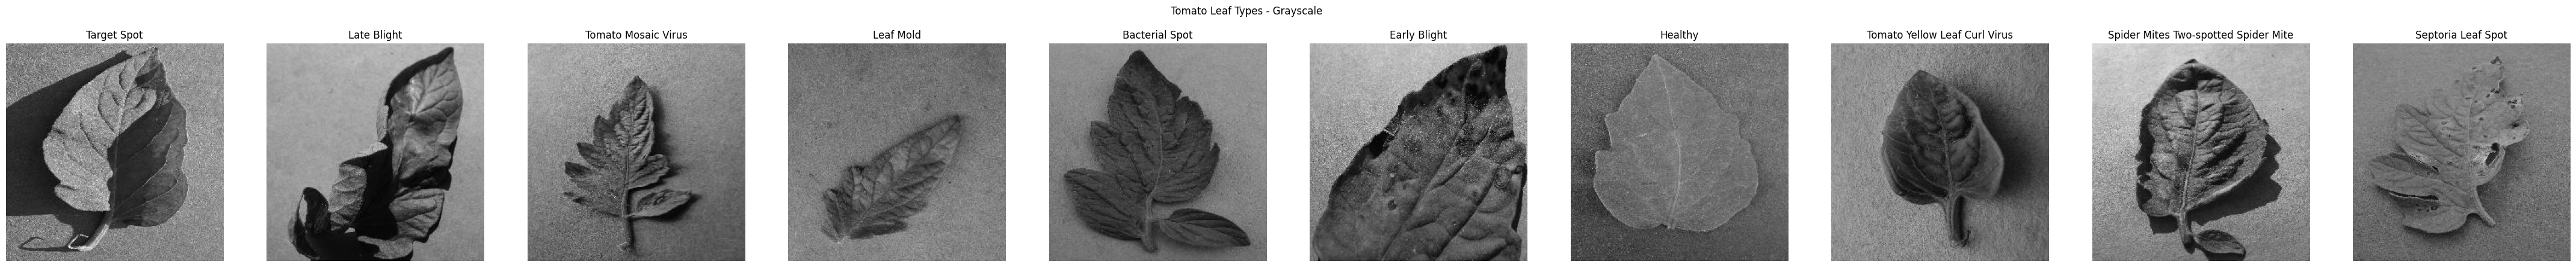

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(55,5))
i = 0

for title in grayscale_first_images_map:
    img = grayscale_first_images_map[title]
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].axis('off')
    i += 1

fig.suptitle('Tomato Leaf Types - Grayscale')
plt.savefig('output/grayscale.png')
plt.show()

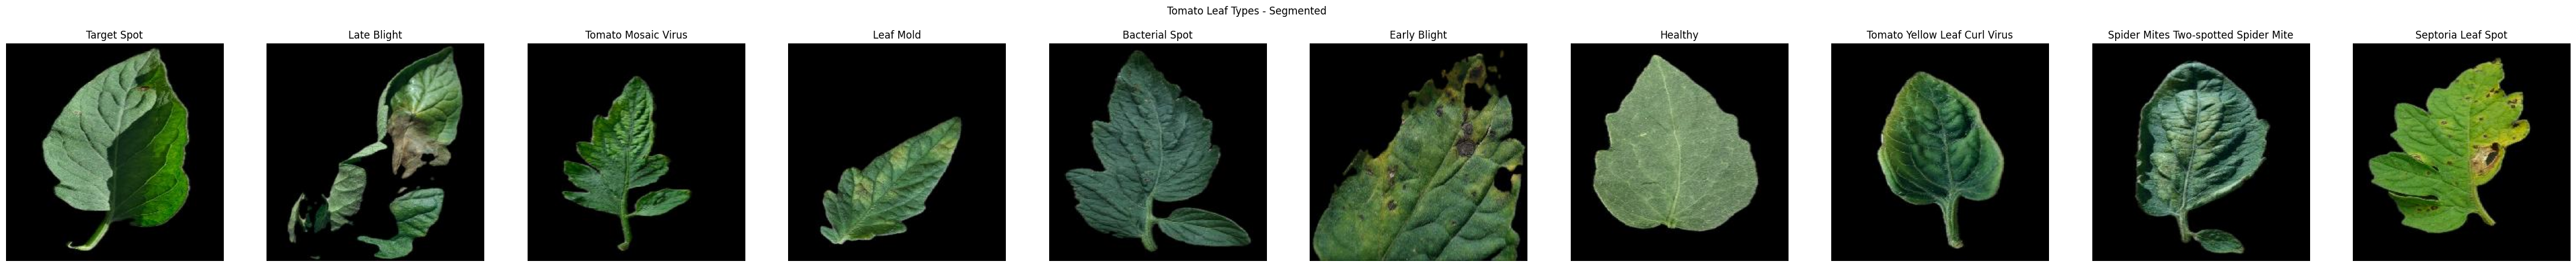

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(55,5))
i = 0

for title in segmented_first_images_map:
    img = segmented_first_images_map[title]
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].axis('off')
    i += 1

fig.suptitle('Tomato Leaf Types - Segmented')
plt.savefig('output/segmented.png')
plt.show()

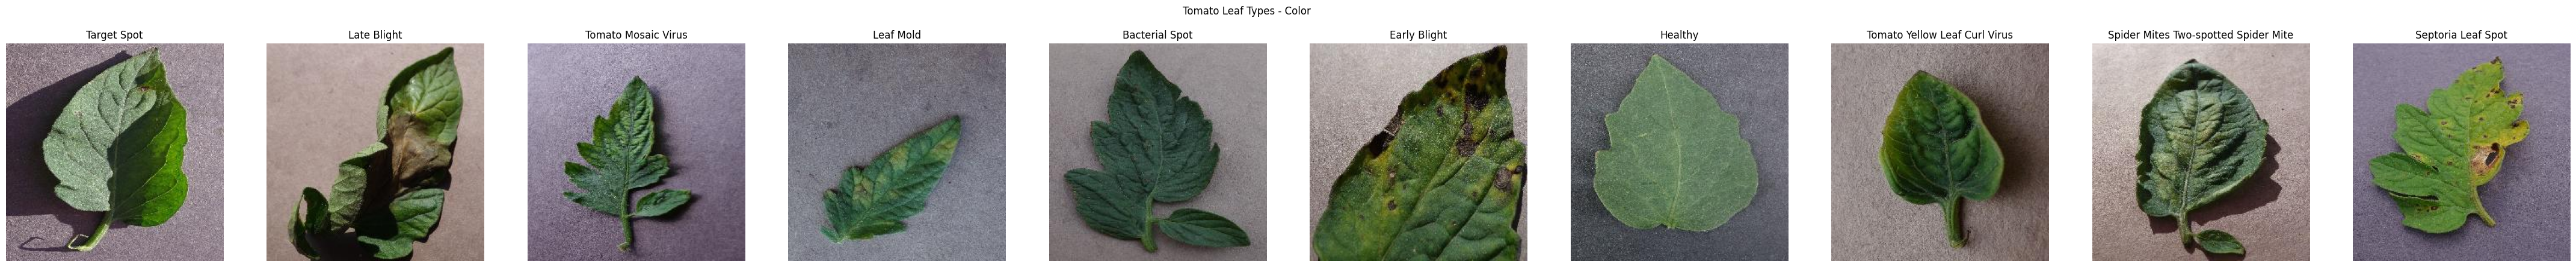

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(55,5))
i = 0

for title in color_first_images_map:
    img = color_first_images_map[title]
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].axis('off')
    i += 1

fig.suptitle('Tomato Leaf Types - Color')
plt.savefig('output/color.png')
plt.show()

### Focusing Further on Segmented View

In [26]:
segmented_cleaned_folder = repo_path + '/input/tomato_leaf_segmented_dataset_clean'

### Consolidating Segmented Data into Two Lists: Images and Labels

In [27]:
def getXAndYData(dir):
    
    images = []
    labels = []
    
    for file in os.listdir(dir):
        d = os.path.join(dir, file)
        if os.path.isdir(d):
            sorted_list = sorted(os.listdir(d))
            for image_file in sorted_list:
                if image_file != ".DS_Store":
                    image_d = os.path.join(d, image_file)
                    img = plt.imread(image_d)
                    images.append(img)
                    labels.append(folder_title_map[file])
                    
    images = np.stack(images)
    labels = np.array(labels).flatten() 
                    
    return images, labels

In [28]:
images, labels = getXAndYData(segmented_cleaned_folder)

In [29]:
print(images.shape)
print(labels.shape)

(18159, 256, 256, 3)
(18159,)


### Viewing Overall Distribution of Each Tomato Leaf Category

In [30]:
print("Overall Distribution")
unique_labels, counts_labels = np.unique(labels, return_counts=True)
unique_count_labels_map = dict(zip(unique_labels, counts_labels))
print(unique_count_labels_map)

Overall Distribution
{'Bacterial Spot': 2127, 'Early Blight': 1000, 'Healthy': 1591, 'Late Blight': 1909, 'Leaf Mold': 952, 'Septoria Leaf Spot': 1771, 'Spider Mites Two-spotted Spider Mite': 1675, 'Target Spot': 1404, 'Tomato Mosaic Virus': 373, 'Tomato Yellow Leaf Curl Virus': 5357}


### Splitting Data into 80% Train / 10% Validation / 10% Test, with Stratified Sampling

In [31]:
def splitData(images, y_list, split=(0.8, 0.1, 0.1)):

    images_map = {}
    
    for image, y in zip(images, y_list):
        if y in images_map:
            images_map[y].append(image)
        else:
            images_map[y] = [image]
    
    for y in images_map.keys():
        images_map[y] = np.array(images_map[y])
        
    flag = False
    X_train, X_val, X_test = None, None, None
    y_train, y_val, y_test = None, None, None
    
    for y, sub_images in images_map.items():
        
        sub_y = np.full((len(sub_images), ), y)

        np.random.seed(1234)
        shuffle = np.random.permutation(np.arange(sub_images.shape[0]))
        sub_images, sub_y = sub_images[shuffle], sub_y[shuffle]

        splits = np.multiply(len(sub_images), split).astype(int)
        X_train_sub, X_val_sub, X_test_sub = np.split(sub_images, [splits[0], splits[0] + splits[1]])
        y_train_sub, y_val_sub, y_test_sub = np.split(sub_y, [splits[0], splits[0] + splits[1]])
        
        if flag == False:
            X_train = X_train_sub
            X_val = X_val_sub
            X_test = X_test_sub
            y_train = y_train_sub
            y_val = y_val_sub
            y_test = y_test_sub
            flag = True
        else:
            X_train = np.vstack((X_train, X_train_sub))
            X_val = np.vstack((X_val, X_val_sub))
            X_test = np.vstack((X_test, X_test_sub))
            y_train = np.concatenate((y_train, y_train_sub), axis = None)
            y_val = np.concatenate((y_val, y_val_sub), axis = None)
            y_test = np.concatenate((y_test, y_test_sub), axis = None)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [32]:
X_train, y_train, X_val, y_val, X_test, y_test = splitData(images, labels)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14523, 256, 256, 3)
y_train shape: (14523,)
X_val shape: (1812, 256, 256, 3)
y_val shape: (1812,)
X_test shape: (1824, 256, 256, 3)
y_test shape: (1824,)


### Viewing Train, Validation, and Test Distributions of Each Tomato Leaf Category

In [33]:
print("Train Distribution")
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_count_train_map = dict(zip(unique_train, counts_train))
print(unique_count_train_map)

Train Distribution
{'Bacterial Spot': 1701, 'Early Blight': 800, 'Healthy': 1272, 'Late Blight': 1527, 'Leaf Mold': 761, 'Septoria Leaf Spot': 1416, 'Spider Mites Two-spotted Spider Mite': 1340, 'Target Spot': 1123, 'Tomato Mosaic Virus': 298, 'Tomato Yellow Leaf Curl Virus': 4285}


In [34]:
print("Validation Distribution")
unique_val, counts_val = np.unique(y_val, return_counts=True)
unique_count_val_map = dict(zip(unique_val, counts_val))
print(unique_count_val_map)

Validation Distribution
{'Bacterial Spot': 212, 'Early Blight': 100, 'Healthy': 159, 'Late Blight': 190, 'Leaf Mold': 95, 'Septoria Leaf Spot': 177, 'Spider Mites Two-spotted Spider Mite': 167, 'Target Spot': 140, 'Tomato Mosaic Virus': 37, 'Tomato Yellow Leaf Curl Virus': 535}


In [35]:
print("Test Distribution")
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_count_test_map = dict(zip(unique_test, counts_test))
print(unique_count_test_map)

Test Distribution
{'Bacterial Spot': 214, 'Early Blight': 100, 'Healthy': 160, 'Late Blight': 192, 'Leaf Mold': 96, 'Septoria Leaf Spot': 178, 'Spider Mites Two-spotted Spider Mite': 168, 'Target Spot': 141, 'Tomato Mosaic Virus': 38, 'Tomato Yellow Leaf Curl Virus': 537}


### Validating Each Category Roughly Meets 80/10/10 Split

In [36]:
for unique_label in unique_count_labels_map:
    print(unique_label)
    print("\tTrain Split: " + str(100 * unique_count_train_map[unique_label] / unique_count_labels_map[unique_label]) + "%")
    print("\tValidation Split: " + str(100 * unique_count_val_map[unique_label] / unique_count_labels_map[unique_label]) + "%")
    print("\tTest Split: " + str(100 * unique_count_test_map[unique_label] / unique_count_labels_map[unique_label]) + "%")

Bacterial Spot
	Train Split: 79.97179125528913%
	Validation Split: 9.96708979783733%
	Test Split: 10.061118946873531%
Early Blight
	Train Split: 80.0%
	Validation Split: 10.0%
	Test Split: 10.0%
Healthy
	Train Split: 79.94971715901949%
	Validation Split: 9.993714644877436%
	Test Split: 10.056568196103079%
Late Blight
	Train Split: 79.98952331063384%
	Validation Split: 9.952854897852278%
	Test Split: 10.057621791513881%
Leaf Mold
	Train Split: 79.93697478991596%
	Validation Split: 9.978991596638656%
	Test Split: 10.084033613445378%
Septoria Leaf Spot
	Train Split: 79.95482778091474%
	Validation Split: 9.994353472614343%
	Test Split: 10.05081874647092%
Spider Mites Two-spotted Spider Mite
	Train Split: 80.0%
	Validation Split: 9.970149253731343%
	Test Split: 10.029850746268657%
Target Spot
	Train Split: 79.98575498575498%
	Validation Split: 9.971509971509972%
	Test Split: 10.042735042735043%
Tomato Mosaic Virus
	Train Split: 79.89276139410188%
	Validation Split: 9.919571045576408%
	Test 

### Displaying Bar Chart Displaying Distribution of Train/Validation/Test for Each Tomato Leaf Category

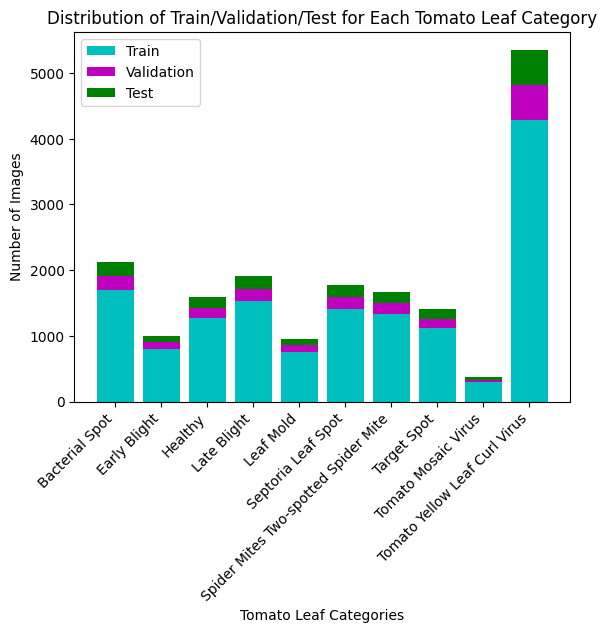

In [37]:
plt.bar(unique_labels, counts_train, color='c')
plt.bar(unique_labels, counts_val, bottom=counts_train, color='m')
plt.bar(unique_labels, counts_test, bottom=counts_train+counts_val, color='g')
plt.xlabel("Tomato Leaf Categories")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Images")
plt.legend(["Train", "Validation", "Test"])
plt.title("Distribution of Train/Validation/Test for Each Tomato Leaf Category")
plt.show()